In [12]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

Loading in the dataset and splitting the data:

In [13]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

### Epoch size

Accuracy as a function of the epoch size for a batch size 10, learning rate 0.001, 50 nodes in the hidden layer and activation functions sigmoid and softmax.

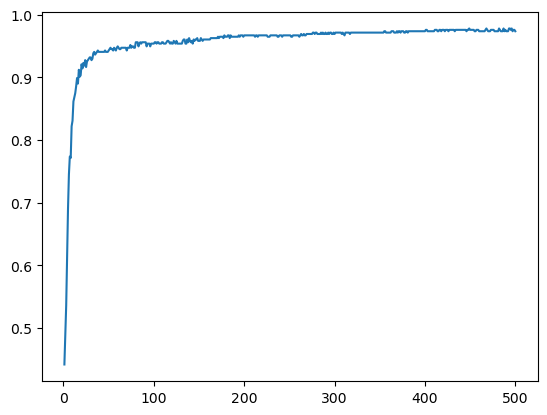

In [10]:
df = pd.read_csv('Results/epoch_size.csv')

plt.plot(np.linspace(1, 500, 500), df['Score'])
plt.show()

### Scores

In [18]:
# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [50, 2]
activations = ['relu', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epsilon=0.01, batch_size=10, epochs=500, llambda=0.01))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_test)

# Evauluate the model
accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy: {accuracy:.4f}')

accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.9098901098901099
Epoch 100: Accuracy = 0.9846153846153847
Epoch 200: Accuracy = 0.989010989010989
Epoch 300: Accuracy = 0.989010989010989
Epoch 400: Accuracy = 0.989010989010989
Train accuracy: 0.9890
Test accuracy: 0.9825


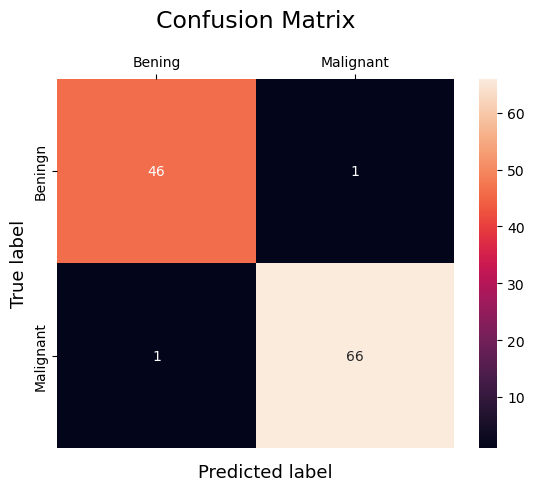

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()


### Gridsearch

#### One hidden layer

In [10]:
k_folds = KFold(n_splits=5)

# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [50, 2]
activations = ['relu', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=50))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'softmax'], ['relu', 'softmax'], ['elu', 'softmax']],
    'model__n_hidden': [[25, 2], [50, 2], [100, 2]]
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Epoch 0: Accuracy = 0.6456043956043956
[CV 1/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, score=0.868 total time=   0.2s
Epoch 0: Accuracy = 0.6291208791208791
[CV 2/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, score=0.835 total time=   0.1s
Epoch 0: Accuracy = 0.21978021978021978
[CV 3/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, score=0.879 total time=   0.1s
Epoch 0: Accuracy = 0.7087912087912088
[CV 4/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, score=0.945 total time=   0.1s
Epoch 0: Accuracy = 0.6428571428571429
[CV 5/5] END model__activations=['sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 2];, sc

In [14]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

# save data to csv-file
results_df.to_csv('Results/gridsearch_wisconsin_50_epochs.csv', sep=',', encoding='utf-8')

#### Two layers

In [8]:
k_folds = KFold(n_splits=5)
layer_output_sizes = [8, 8, 3]
activations = ['sigmoid', 'sigmoid', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=50))
])

param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'sigmoid', 'softmax'], ['relu', 'relu', 'softmax'], ['elu', 'elu', 'softmax']],
    'model__n_hidden': [[25, 25, 2], [50, 50, 2], [100, 100, 2]]
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Epoch 0: Accuracy = 0.6263736263736264
[CV 1/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.736 total time=   0.2s
Epoch 0: Accuracy = 0.3708791208791209
[CV 2/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.648 total time=   0.2s
Epoch 0: Accuracy = 0.6401098901098901
[CV 3/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.538 total time=   0.2s
Epoch 0: Accuracy = 0.3543956043956044
[CV 4/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=0.879 total time=   0.2s
Epoch 0: Accuracy = 0.7774725274725275
[CV 5/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'],

In [15]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

# save data to csv-file
results_df.to_csv('Results/gridsearch_wisconsin_two_layers_50_epochs.csv', sep=',', encoding='utf-8')